In [50]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dataset = pd.read_csv(r"D:\data analysis\uber-raw-data-sep14.csv")

In [52]:
dataset

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


# dataset info

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [54]:
(dataset.isnull().sum()/dataset.shape[0])*100

Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

In [55]:
dataset.duplicated().sum()
# dataset.drop_duplicates(inplace = True)

np.int64(24037)

# Date/Time

In [56]:
#dataset['Date/Time dup'] = dataset['Date/Time']

In [57]:
#dataset['Date/Time dup'].unique()

In [58]:
dataset["Date/Time"].unique()

array(['9/1/2014 0:01:00', '9/1/2014 0:03:00', '9/1/2014 0:06:00', ...,
       '9/30/2014 3:01:00', '9/30/2014 3:07:00', '9/30/2014 3:26:00'],
      dtype=object)

In [59]:

#dataset['Date/Time dup'].str.split(" ")

In [60]:
dataset["Date/Time"] = pd.to_datetime(dataset["Date/Time"],format='%m/%d/%Y %H:%M:%S')

In [61]:
dataset["Year"] = dataset["Date/Time"].dt.year

In [63]:
dataset["Year"].unique()

array([2014], dtype=int32)

In [64]:
dataset["Month"]=dataset["Date/Time"].dt.month

In [65]:
dataset["Month"].unique()

array([9], dtype=int32)

In [97]:
#dataset["Date/Time"] = pd.to_datetime(dataset["Date/Time"],format='%m/%d/%Y/%U %H:%M:%S')

In [98]:
#dataset['week'] = dataset['Date/Time'].dt.strftime('%U')

In [99]:
#dataset["Week"]=dataset["Date/Time"].dt.week

In [101]:
#dataset["Week"].unique()

In [68]:
dataset["Day"]=dataset["Date/Time"].dt.day

In [69]:
dataset["Day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int32)

In [70]:
dataset["Hour"]=dataset["Date/Time"].dt.hour

In [71]:
dataset["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [72]:
dataset["Minute"]=dataset["Date/Time"].dt.minute

In [73]:
dataset["Minute"].unique()

array([ 1,  3,  6, 11, 12, 15, 16, 32, 33, 37, 38, 39, 48, 49,  8, 17, 19,
       41, 13, 18, 20, 34,  2, 25, 29, 45, 55, 56,  4, 14, 26, 35, 43, 51,
       22, 30, 58,  5, 21, 40, 44, 53, 57, 59, 10, 23, 42, 54,  9, 24, 28,
       52,  7, 31, 36, 46, 47, 27,  0, 50], dtype=int32)

In [74]:
#dataset = dataset.drop(columns = ["Date/Time"],inplace = True)

# Lat

In [75]:
dataset["Lat"].unique()

array([40.2201, 40.75  , 40.7559, ..., 40.9195, 41.1399, 40.9942])

In [76]:
dataset["Lat"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028136 entries, 0 to 1028135
Series name: Lat
Non-Null Count    Dtype  
--------------    -----  
1028136 non-null  float64
dtypes: float64(1)
memory usage: 7.8 MB


In [77]:
dataset["Lat"].isnull().sum()

np.int64(0)

In [78]:
dataset = dataset.rename(columns={'Lat': 'Latitude'})

# Lon

In [79]:
dataset["Lon"].unique()

array([-74.0021, -74.0027, -73.9864, ..., -73.1711, -73.0575, -74.2278])

In [80]:
dataset["Lon"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028136 entries, 0 to 1028135
Series name: Lon
Non-Null Count    Dtype  
--------------    -----  
1028136 non-null  float64
dtypes: float64(1)
memory usage: 7.8 MB


In [81]:
dataset["Lon"].isnull().sum()

np.int64(0)

In [82]:
dataset = dataset.rename(columns={'Lon': 'Longitude'})

In [83]:
dataset

,Date/Time,Latitude,Longitude,Base,Year,Month,Day,Hour,Minute
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,2014,9,1,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,2014,9,1,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,2014,9,1,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,2014,9,1,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,2014,9,1,0,11
...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014,9,30,22,57
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014,9,30,22,57
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014,9,30,22,58
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014,9,30,22,58


# Base

In [84]:
dataset["Base"].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [85]:
dataset["Base"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028136 entries, 0 to 1028135
Series name: Base
Non-Null Count    Dtype 
--------------    ----- 
1028136 non-null  object
dtypes: object(1)
memory usage: 7.8+ MB


In [86]:
dataset["Base"].isnull().sum()

np.int64(0)

In [88]:
# dataset.head(2)

# re arrange 

In [89]:
dataset

,Date/Time,Latitude,Longitude,Base,Year,Month,Day,Hour,Minute
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,2014,9,1,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,2014,9,1,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,2014,9,1,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,2014,9,1,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,2014,9,1,0,11
...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014,9,30,22,57
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014,9,30,22,57
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014,9,30,22,58
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014,9,30,22,58


In [45]:
dataset.to_csv("clean_uber.csv",index = False)

<!-- 8) are there specific times of the day or week when activity is more likely to be concentrated in particular location -->

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dataset = pd.read_csv(r"D:\data analysis\uber_clean.csv")

In [2]:
dataset.head(5)

,Latitude,Longitude,Base,Year,Month,Day,Hour,Minute
0,40.2201,-74.0021,B02512,2014,9,1,0,1
1,40.7500,-74.0027,B02512,2014,9,1,0,1
2,40.7559,-73.9864,B02512,2014,9,1,0,3
3,40.7450,-73.9889,B02512,2014,9,1,0,6
4,40.8145,-73.9444,B02512,2014,9,1,0,11


# Questions

In [3]:
"""1) what are the peak month ?
   2) what are the peak week ? 
   3) what are the peak days ?
   4) what are the peak hours ?
   5) most frequent location ?
   6) any significant difference between long and latfor diff base ?
   7) activity vary by the base ?
   8) are there specific times of the day or week when activity is more 
      likely to be concentrated in particular location ? """

'1) what are the peak month ?\n   2) what are the peak week ? \n   3) what are the peak days ?\n   4) what are the peak hours ?\n   5) most frequent location ?\n   6) any significant difference between long and latfor diff base ?\n   7) activity vary by the base ?\n   8) are there specific times of the day or week when activity is more \n      likely to be concentrated in particular location ? '

# 1) what are the peak month ?

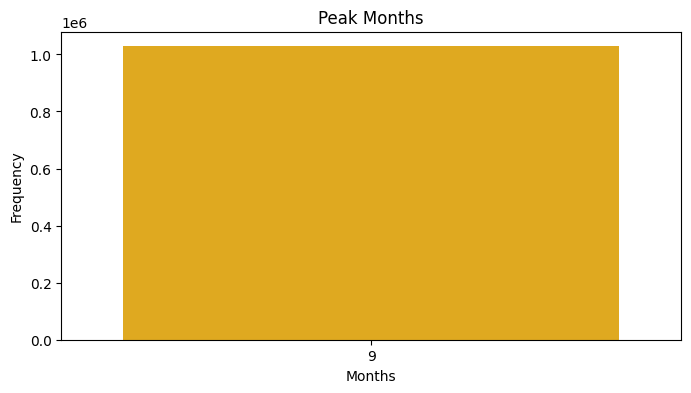

In [27]:
month = dataset["Month"].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=month.index, y=month,color='#FFB700')
plt.title('Peak Months')
plt.xlabel('Months')
plt.ylabel('Frequency')
#plt.savefig("g1.jpg")

# 2) what are the peak week ?

In [5]:
# week = dataset["Weeks"].value_counts()
# plt.figure(figsize=(8, 4))
# sns.barplot(x=week.index, y=week,color='lightred')
# plt.title('Peak Weeks')
# plt.xlabel('Day`s')
# plt.ylabel('Frequency')
# plt.savefig("g2.jpg")

# 3) what are the peak days ?

Text(0, 0.5, 'Frequency')

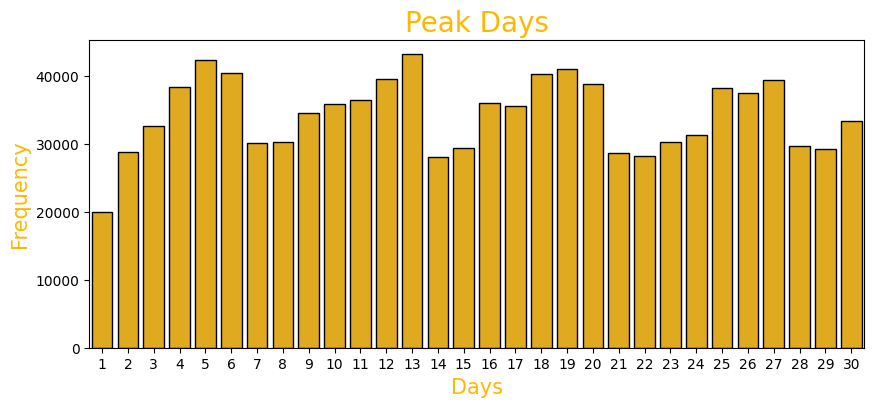

In [30]:
day = dataset["Day"].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=day.index, y=day,edgecolor='black',linewidth=1,color='#FFB700',)
plt.title('Peak Days',fontsize = 20, color="#FFB700")
plt.xlabel('Days',fontsize=15,color="#FFB700")
plt.ylabel('Frequency',fontsize= 15,color="#FFB700")
# sns.patch.set_facecolor('black')
#plt.savefig("g3.jpg")

# 4) what are the peak hours ?

Text(0, 0.5, 'Frequency')

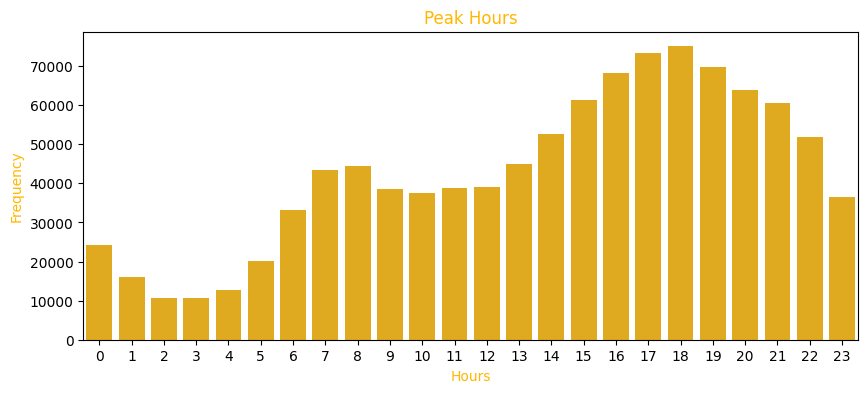

In [31]:
hr = dataset["Hour"].value_counts() 
plt.figure(figsize=(10, 4)) 
sns.barplot(x=hr.index, y=hr,color='#FFB700') 
plt.title('Peak Hours',color='#FFB700') 
plt.xlabel('Hours',color='#FFB700')
plt.ylabel('Frequency',color='#FFB700') 
#plt.savefig("g4.jpg")

# 5) most frequent location ?

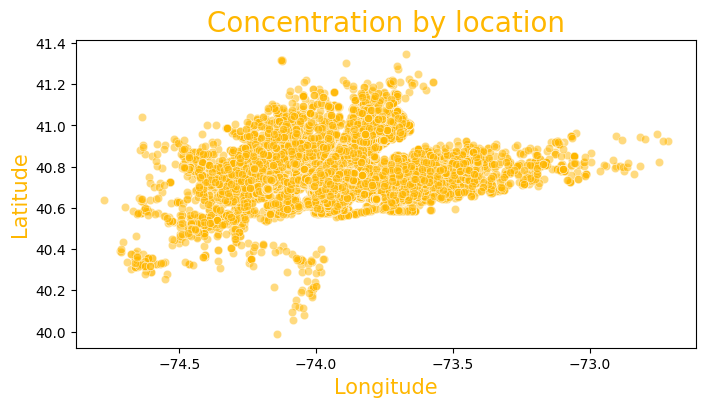

In [32]:
lat = dataset["Latitude"].value_counts()
long = dataset["Longitude"].value_counts()
plt.figure(figsize=(8,4))
sns.scatterplot(x=dataset["Longitude"],y= dataset["Latitude"], alpha=0.5, color='#FFB700')
#sns.scatterplot(x = 'Latitude', y= 'Longitude', alpha=0.5, color='b')
plt.title('Concentration by location',fontsize = 20,color='#FFB700')
plt.xlabel('Longitude',fontsize=15,color='#FFB700')
plt.ylabel('Latitude',fontsize= 15,color='#FFB700')
# plt.grid(True)
# plt.tight_layout()
plt.show()
#plt.savefig("g5.jpg")

In [20]:
dataset["Latitude"] = pd.to_numeric(dataset["Latitude"],errors='coerce')
dataset["Longitude"] = pd.to_numeric(dataset["Longitude"],errors='coerce')


In [19]:
# lat = dataset["Latitude"].value_counts()
# long = dataset["Longitude"].value_counts()
# plt.figure(figsize=(8,4))
# sns.kdeplot(x="lat",y="long", hue="Hour",cmap="Red",shade = True , bw_adjust=0.5)
# #sns.kdeplot(x=lat, y=long, cmap="Reds",shade = True ,bw_adjust=0.5)
# plt.title('Concentration by location',fontsize = 20)
# plt.xlabel('Longitude',fontsize=15)
# plt.ylabel('Latitude',fontsize= 15)
# plt.show()
#plt.savefig("most frequent ocations.jpg")

# 6) any significant difference between long and latfor diff base ?

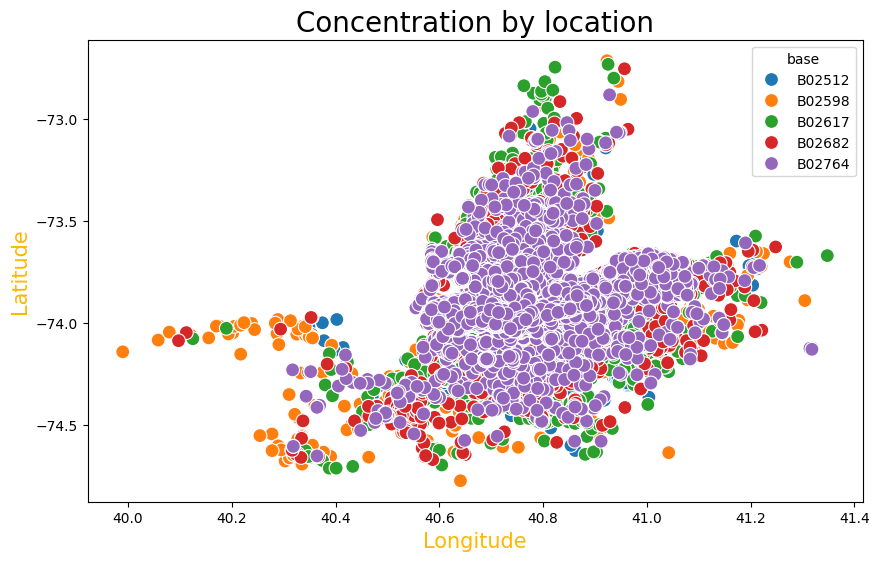

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Latitude", y = "Longitude", hue="Base" , data = dataset,color ='#FFB700', s = 100) 
plt.title('Concentration by location',fontsize = 20)
plt.xlabel('Longitude',fontsize=15,color='#FFB700')
plt.ylabel('Latitude',fontsize= 15,color='#FFB700')
plt.legend(title="base")
plt.show()
#plt.savefig("g6.jpg")

# 7) activity vary by the base ?

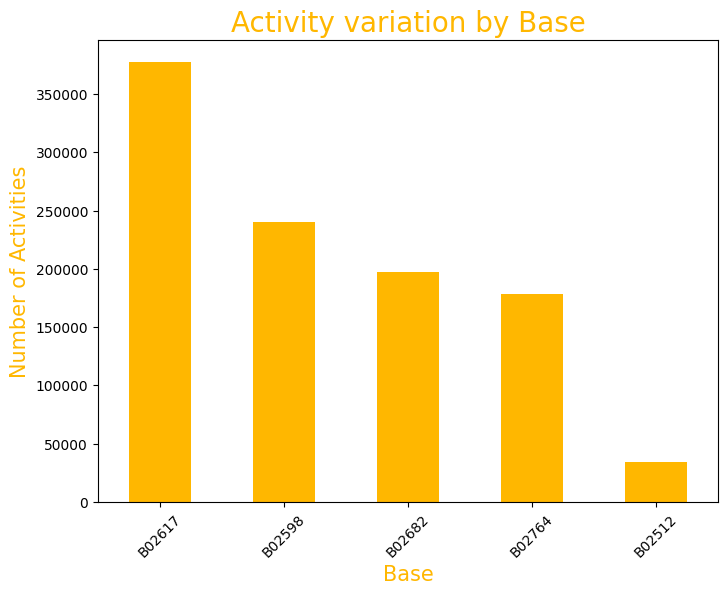

In [40]:
base = dataset["Base"].value_counts()
plt.figure(figsize = (8,6))
base.plot(kind="bar",color='#FFB700')
plt.title('Activity variation by Base',fontsize = 20,color='#FFB700')
plt.xlabel('Base',fontsize=15,color='#FFB700')
plt.ylabel('Number of Activities',fontsize= 15,color='#FFB700')
plt.xticks(rotation=45)
plt.show()
#plt.savefig("g7.jpg")

# 8) are there specific times of the day or week when activity is more likely to be concentrated in particular location ?

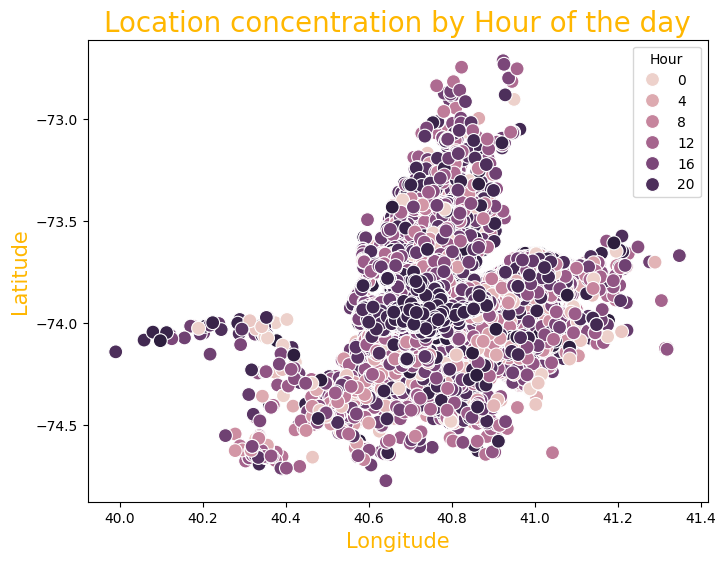

In [39]:
plt.figure(figsize = (8,6))
sns.scatterplot(x="Latitude", y = "Longitude", hue = "Hour" , data = dataset,color='#FFB700',s=100) 
plt.title('Location concentration by Hour of the day',fontsize = 20,color='#FFB700')
plt.xlabel('Longitude',fontsize=15,color='#FFB700')
plt.ylabel('Latitude',fontsize= 15,color='#FFB700')
#plt.colorbar(label = "Hourof the Day")
plt.show()
#plt.savefig("g8.jpg")